# Regresión Lineal

In [53]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

## Dataset
Vamos a trabajar con el Dataset `diabetes` de la libreria `sklearn`. La documentacion sobre este dataset puede ser encontrada [aca](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html).

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of n_samples (i.e. the sum of squares of each column totals 1).

Source URL: https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see: Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) “Least Angle Regression,” Annals of Statistics (with discussion), 407-499. (https://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf)

In [25]:
# cargamos el dataset
diabetes = datasets.load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

Como vemos el dataset `diabetes` no solo contiene datos en forma de tabla sino que tiene muchas mas informacion.

Para acceder a esa informacion podemor usar el metodo `dir()`

**Es sumamente importante analizar profundamente el dataset antes de comenzar a trabajar**

In [29]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [26]:
dir(diabetes)

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [31]:
type(diabetes.data)

numpy.ndarray

In [40]:
diabetes.target
# Target: quantitative measure of disease progression one year after baseline

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

Vemos que los datos del dataset estan almacenados en el atributo data bajo el formato de un array (matriz) de Numpy.

In [32]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Son los nombres de los tributos almacenados en el dataset. En terminos de una Tabla o un Dataframe, estos serian los titulos de las columnas

In [35]:
# podemos visualizar los datos como una DF de pandas
df = pd.DataFrame(data = diabetes.data, columns = diabetes.feature_names)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [131]:
# agregamos al df la columna target
df['Target'] = diabetes.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [120]:
# por el momento solo nos vamos a quedar con los datos de la columna 'bmi', body mass index
diabetes_X = diabetes.data[:,np.newaxis,2]
diabetes_X[:5]

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469]])

## Train/Test
Si bien sabemos que podemos usar la clase train_test_splir de sklearn para hacer la division entre conjuntos de entrenamiento y validacion, en este caso vamos a hacer una division manual del dataset

In [38]:
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

Exploremos un poco lo que hemos hecho

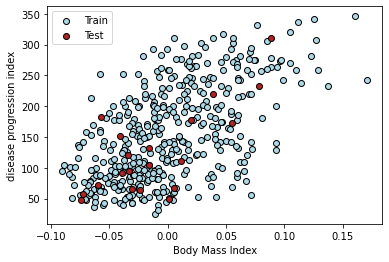

In [52]:
plt.figure()

# scatterplot para los datos de entrenamiento
plt.scatter(diabetes_X_train, diabetes_y_train, color = 'lightblue', edgecolors = 'black', label = 'Train')
plt.scatter(diabetes_X_test, diabetes_y_test, color = 'firebrick', edgecolors = 'k', label = 'Test')

plt.legend()

plt.xlabel('Body Mass Index')
plt.ylabel('disease progression index')

plt.show()

Un analisis exploratorio sencillo muestra que entre las variables bmi y target podria haber, al menos en cierto grado, una correlacion lineal. Por lo tanto vamos a entrenar un modelo de regresion lineal (con una sola variable) que nos pormita predecir el Indice de progreso de la enfermedad a partir de Indice de masa Corporal.

# `LinearRegression()`

## Una variable

$y = \beta_0 + \beta_1 x_1$

In [62]:
# 1. Instanciamos la clase LinaearRegression(), es decir, seleccionamos el modelo que luego vamos a entrenar
regr = LinearRegression(fit_intercept = True)

# 2 .Entrenamos el modelo utilizando los datos de entrenamiento
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

Vamos a hacer una analisis rapido de los resultados del entrenamiento del modelo de regresion lineal con una variable.

In [63]:
regr.coef_
# El modelo de regresion lineal que entrenamos esta representado por una recta,
# por lo tanto el unico coef que tenemos es la pendiente. 

array([938.23786125])

In [64]:
regr.intercept_
# ordenada al origen de la ecuacion que representa el modelo.

152.91886182616113

In [65]:
regr.n_features_in_
# indica que el modelo fue entrenado con una sola feature. En este caso fue la 'bmi'

1

## `predict`

In [66]:
# 3. Hacemos las predicciones utilizando el modelo entrenado
diabetes_y_pred = regr.predict(diabetes_X_test)

---

## Resultados

-------------------- RESULTS ---------------------
Coefficients 938.24
Intercept 152.92
--------------------------------------------------
Mean squared error (Test): 2548.07
R2: 0.47
--------------------------------------------------


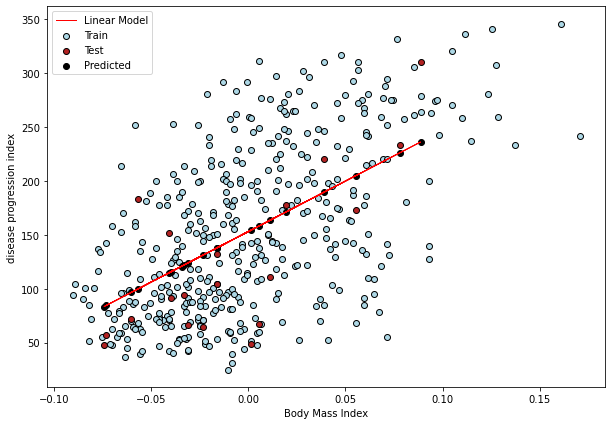

In [106]:
# Coeficientes
print(' RESULTS MODEL 1'.center(50, '-'))
print(f'Coefficients {regr.coef_[0].round(2)}')
print(f'Intercept {regr.intercept_.round(2)}')
print('-'*50)

# Mean squared Error
print(f'Mean squared error (Test): {mean_squared_error(diabetes_y_test, diabetes_y_pred).round(2)}')

# Explained variance score: 1 is perfect prediction
print(f'R2: {r2_score(diabetes_y_test, diabetes_y_pred).round(2)}')
print('-'*50)

# Plot Outputs
plt.figure(figsize = (10,7))
# 1. Datos de entrenamiento y test
plt.scatter(diabetes_X_train, diabetes_y_train, color = 'lightblue', edgecolors = 'black', label = 'Train')
plt.scatter(diabetes_X_test, diabetes_y_test, color = 'firebrick', edgecolors = 'k', label = 'Test')

# 2. Valores predichos por el modelo
plt.scatter(x = diabetes_X_test, y = diabetes_y_pred, color = 'black', label = 'Predicted')

# 3. Graficamos la ecuacion de la recta que representa el modelo entrenado.
plt.plot(diabetes_X_test, diabetes_y_pred,'-', color='red', linewidth=1, label = 'Linear Model')
# plt.plot(diabetes_X_test, diabetes_y_pred,'-', color='red', linewidth=1)

plt.legend()

plt.xlabel('Body Mass Index')
plt.ylabel('disease progression index')

plt.show()

Si analizamos el Mean Squared Error vemos que es bastante elevado. Si bien el modelo no es tan malo, es claro que puede ser mejorado.

Vemos que si bien las variables tienen un cierto grado de correlacion, no toda la variabilidad de Disease progression index puede ser explicada por la variabilidad de Body Mass Index.

Por lo tanto en una situacion como esta lo que debemos hacer es buscar otras features que nos permitan mejorar el modelo.

# Y las demás variables?

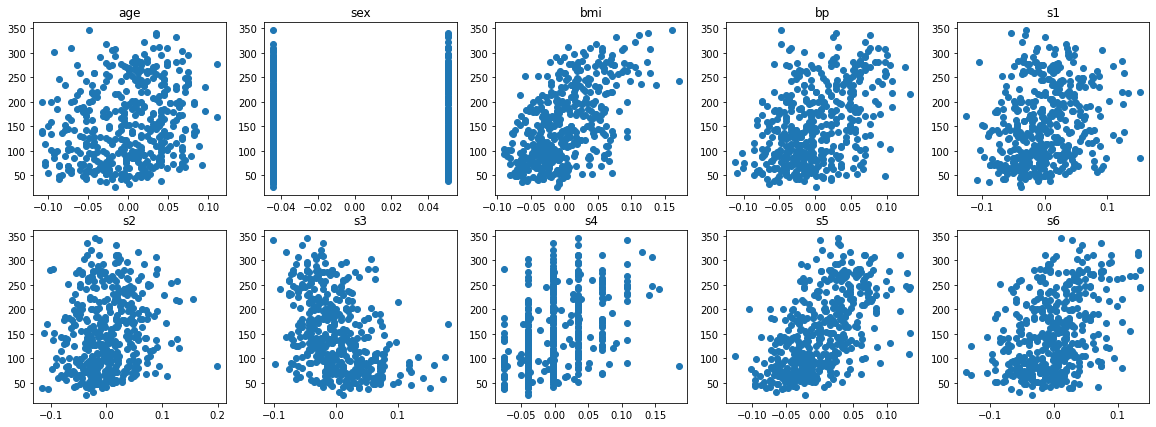

In [136]:
plt.figure(figsize=(20,7))
i = 0
for var, name in zip(diabetes.data.T, diabetes.feature_names):
    i += 1
    plt.subplot(2,5,i)
    plt.scatter(var,diabetes.target)
    plt.title(name)

Un analisis exploratorio sencillo muestra que la variable S5 precente un cierto grado de correlacion con Disease progrssion index con lo cual podriamos suponer que incorporar esta varibale a nuestro modelo linel podria mejorar el modelo.

# `LinearRegression()`

## Dos variables

$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2$

In [138]:
# seleccionamos las features que vamos a usar para entrenar el modelo de regresion lineal
diabetes_X2 = diabetes.data[:,[2,8]] # bmi and s5
diabetes_X2[:5]

array([[ 0.06169621,  0.01990749],
       [-0.05147406, -0.06833155],
       [ 0.04445121,  0.00286131],
       [-0.01159501,  0.02268774],
       [-0.03638469, -0.03198764]])

In [139]:
# Split the data into training/testing sets
diabetes_X_train2 = diabetes_X2[:-20]
diabetes_X_test2 = diabetes_X2[-20:]

# notar que no es necesario volver a hacer la division de los datos de target.

In [140]:
# 1. Instanciamos la clase LinearRegression(), es decir definimos el modelo de ML con el que vamos a trabajar.
regr2 = LinearRegression()

# 2. Entrenamos el modelo
regr2.fit(diabetes_X_train2, diabetes_y_train)

LinearRegression()

In [141]:
regr2.coef_
# ahora tenemos 2 coeficiente, porque el modelo tiene dos variables
# el modelo ya no puede ser representado con la ecuacion de una recta en un esapcio de 2 dimensiones.
# el model ahora tiene que ser representado la ecuacion de un plano en un esapcio de 3 dimensiones.

array([669.65259645, 609.7326832 ])

In [142]:

# 3. Hacemos las predicciones
diabetes_y_pred2 = regr2.predict(diabetes_X_test2)

In [149]:
# Coeficientes
print(' RESULTS MODEL 2'.center(50, '-'))
print(f'Coefficients {regr2.coef_}')
print(f'Intercept {regr2.intercept_}')
print('-'*50)

# Mean squared Error
print(f'Mean squared error (Test): {mean_squared_error(diabetes_y_test, diabetes_y_pred2).round(2)}')

# Explained variance score: 1 is perfect prediction
print(f'R2: {r2_score(diabetes_y_test, diabetes_y_pred2).round(2)}')
print('-'*50)


----------------- RESULTS MODEL 2-----------------
Coefficients [669.65259645 609.7326832 ]
Intercept 152.94615870263704
--------------------------------------------------
Mean squared error (Test): 1984.49
R2: 0.59
--------------------------------------------------


Analizando los resultados de Mean Squared Error y R2 vemos que el Modelo2 que fue entrenado con 2 variables se desempenia un poco mejor que el Modelo 1 que habia sido entrenado solo con una variable.

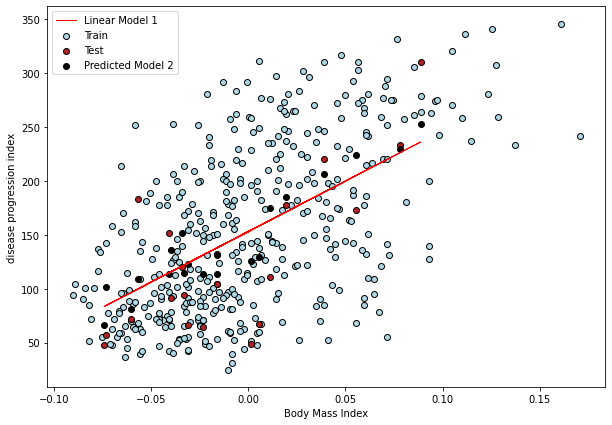

In [152]:
# Plot Outputs
plt.figure(figsize = (10,7))
# 1. Datos de entrenamiento y test
plt.scatter(diabetes_X_train2[:,0], diabetes_y_train, color = 'lightblue', edgecolors = 'black', label = 'Train')
plt.scatter(diabetes_X_test2[:,0], diabetes_y_test, color = 'firebrick', edgecolors = 'k', label = 'Test')

# 2. Valores predichos por el modelo 2
plt.scatter(x = diabetes_X_test2[:,0], y = diabetes_y_pred2, color = 'black', label = 'Predicted Model 2')

# 3. Graficamos la ecuacion de la recta que representa el modelo entrenado.
plt.plot(diabetes_X_test, diabetes_y_pred,'-', color='red', linewidth=1, label = 'Linear Model 1')

plt.legend()

plt.xlabel('Body Mass Index')
plt.ylabel('disease progression index')

plt.show()

Lo que hicimos con este grafico fue aplanar el espacio de 3 dimensiones en 2 dimensiones para poder compara los resultados de los dos modelos. Los puntos negros corresponden a los resultados redichos por el modelo 2, los puntos rojo corresponden a los datos de test y la recta roja el modelo 1. 

## Veamos en gráficos 3D que está sucediendo

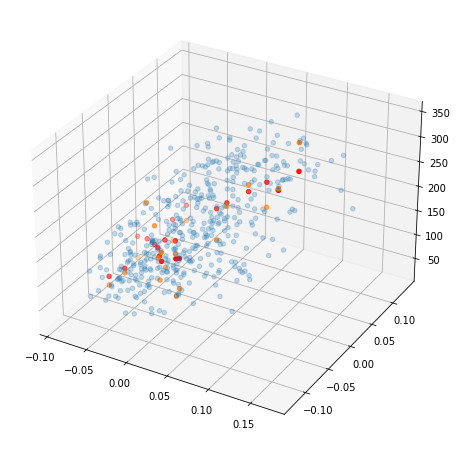

In [157]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(*diabetes_X_train2.T, diabetes_y_train,alpha=0.25)
ax.scatter(*diabetes_X_test2.T, diabetes_y_test)
ax.scatter(*diabetes_X_test2.T, diabetes_y_pred2,c='red')
plt.show()

In [158]:
df = pd.DataFrame(diabetes_X_test2)
df['target'] = diabetes_y_test
df['pred1'] = diabetes_y_pred
df['pred2'] = diabetes_y_pred2

fig1 = px.scatter_3d(df, x=0, y=1 , z='target',
                     color_discrete_sequence=['orange' for i in df.target], 
                     size=[0.1 for i in df.target])
fig2 = px.scatter_3d(df, x=0, y=1 , z='pred1',
                     color_discrete_sequence=['red' for i in df.target], 
                     size=[0.1 for i in df.target])
fig3 = px.scatter_3d(df, x=0, y=1 , z='pred2',
                     color_discrete_sequence=['green'for i in df.target], 
                     size=[0.1 for i in df.target])
fig4 = go.Figure(data=fig1.data+fig2.data+fig3.data)
fig4.show()